## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib notebook

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on=['Mouse ID'])

# Display the data table for preview
#len(combined_mouse_study) #this is to check cleaning later
combined_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = combined_mouse_study['Mouse ID'].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#combine_dup_drop = combined_mouse_study.loc[:,~combined_mouse_study.columns.duplicated()]
#combine_dup_drop = combined_mouse_study.iloc[5].drop_duplicates
#combine_dup_drop

combine_drop = combined_mouse_study.sort_values('Mouse ID').drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
combine_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = combine_drop['Mouse ID'].unique()
len(mouse_count2)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#calculate
mean = combine_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combine_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combine_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combine_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combine_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#make a dataframe to hold the calculations above
combine_drop_summary = pd.DataFrame({'Mean': mean, 
                                     'Median': median, 
                                     'Variance': variance, 
                                     'Standard Deviation': stdv, 
                                     'SEM': sem})
#clean it
Format_CalcDf = {'Mean': '{0:,.3f}',
                'Median': '{0:,.3f}', 
                'Variance': '{0:,.3f}',
                'Standard Deviation': '{0:,.3f}',
                'SEM': '{0:,.3f}'}

#print calculation
combine_drop_summary.style.format(Format_CalcDf)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.387,50.784,43.243,6.576,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

<IPython.core.display.Javascript object>


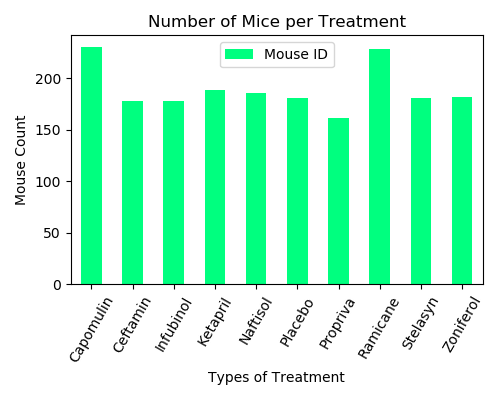

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#dataframe.plot way

#make a new dataframe - groupby Drug regiment - count -  use reset index or this doesn't work
plot_df = pd.DataFrame(combined_mouse_study.groupby(['Drug Regimen']).count()).reset_index()

# Chart Drug and Mouse ID
drug_data = plot_df[['Drug Regimen','Mouse ID']]

# Set the index 
drug_data = drug_data.set_index("Drug Regimen")

# Use DataFrame.plot.bar(put what works best here) to create a bar chart, pick a color, rotate the xaxis
drug_data.plot.bar(figsize=(5,4), color='springgreen', rot=60)

#Add some labels
plt.title("Number of Mice per Treatment")
plt.xlabel("Types of Treatment")
plt.ylabel("Mouse Count")

#Print nicely
plt.show()
plt.tight_layout()

In [10]:
#This stops the next one from just changing another one
plt.close()

In [11]:
#Pyplot way

#use combine drop summary index for x_axis
drugs_names = combine_drop_summary.index.tolist()

# Make drug count a list
drug_count = (combine_drop.groupby(['Drug Regimen'])['Age_months'].count()).tolist()

#count how many drugs
x_axis2 = np.arange(len(drug_count))


# Define x-axis
x_axis2 = drugs_names

<IPython.core.display.Javascript object>


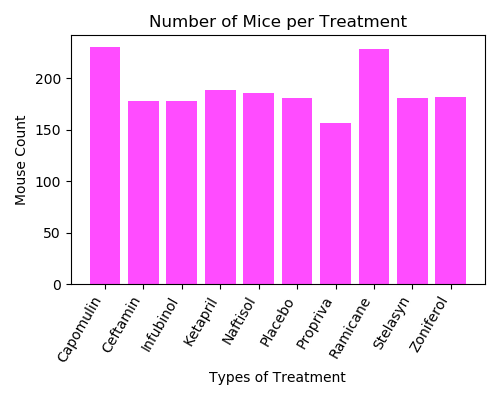

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create a bar chart based upon the above data
plt.figure(figsize=(5,4))
plt.bar(x_axis2, drug_count, color='magenta', alpha=0.7, align='center')

#Add some labels
plt.title('Number of Mice per Treatment')
plt.xlabel('Types of Treatment')
plt.ylabel('Mouse Count')

#Print nicely
plt.xticks(rotation=60, horizontalalignment='right')
plt.show()
plt.tight_layout()


In [13]:
#This stops the next one from just changing another one
plt.close()

<IPython.core.display.Javascript object>


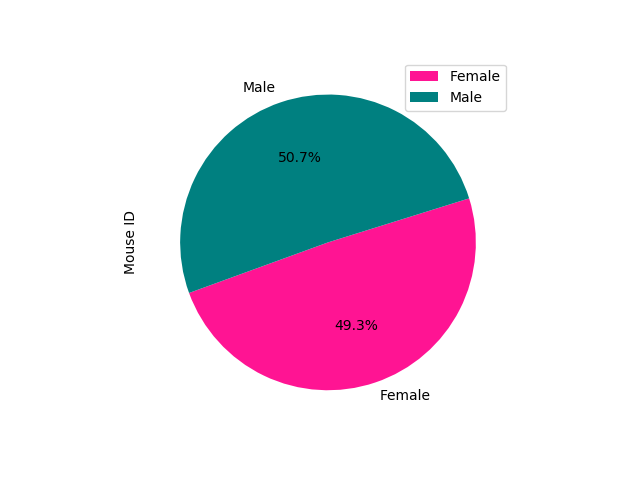

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#use groupby - count genders - use reset_index or it won't work!
genders = pd.DataFrame(combine_drop.groupby(["Sex"]).count()).reset_index()

# Chart Gender and Mouse ID
genders = genders[["Sex","Mouse ID"]]

#pretty it
colors = ["deeppink", "teal"]

#print
genders.groupby(['Sex']).sum().plot.pie (y='Mouse ID', colors=colors, startangle=200, autopct='%1.1f%%')

In [15]:
#This stops the next one from just changing another one
plt.close()

<IPython.core.display.Javascript object>


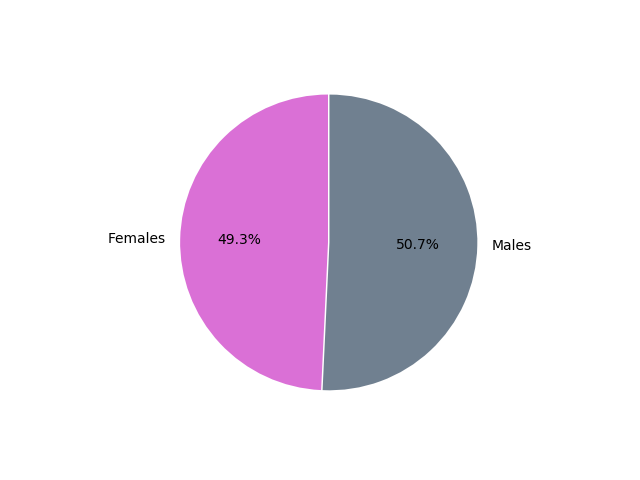

([<matplotlib.patches.Wedge at 0x2bade6e2288>,
 [Text(-1.099701533132135, 0.025622998006324282, 'Females'),
  Text(1.1096988173761604, -0.025856038249338596, 'Males')],
 [Text(-0.5998371998902553, 0.013976180730722335, '49.3%'),
  Text(0.6098344852247367, -0.014209174173059948, '50.7%')])

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders2 = (combine_drop.groupby(["Sex"])["Age_months"].count()).tolist()

#labels
labels = ["Females", "Males"]

#pretty it
colors = ["orchid", "slategrey"]

plt.pie(genders2, labels=labels, colors=colors, explode=[.0,.01], startangle=90, autopct='%1.1f%%')

In [17]:
#This stops the next one from just changing another one
plt.close()

## Quartiles, Outliers and Boxplots

In [18]:
#make a table to sort the data by(drug, id, time) 
sorttumors = combine_drop.sort_values(['Drug Regimen', 'Mouse ID', 'Timepoint'], ascending=True)
sorttumors.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
greatesttime = combine_drop['Timepoint'].max
greatesttime()


45

In [20]:
#calculate the final tumor volume
finaltumor = sorttumors.loc[sorttumors["Timepoint"] == 45]
finaltumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...
1344,p136,Zoniferol,Female,5,28,45,63.488697,2
1416,q511,Zoniferol,Female,2,28,45,68.611061,3
1434,q633,Zoniferol,Male,12,25,45,70.827796,2
1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = []
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


#treatments = combine_drop[combine_drop['Drug Regimen'].isin(treatments)]

#treatments.head()

In [22]:

counter = 0
# Create empty list to fill with tumor vol data (for plotting)
tumorvol = ()
fintumor = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    fintumor = finaltumor.loc[finaltumor['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    quartiles = fintumor.quantile([.25, .5, .75]).round(2)
    upperq = quartiles[0.75].round(2)
    lowerq= quartiles[0.25].round(2)
    iqr = round(upperq-lowerq,2)
        
    
    # Determine outliers using upper and lower bounds
    upperb = round(upperq + (1.25*iqr),2)
    lowerb = round(lowerq + (1.25*iqr),2)
    
    
    if counter == 0:
        print(f"-~-~-~-~-~-~-~-~-~-~")
        print(f"The {drug} IQR data is:")
        print(f"The upper quartile of {drug} is {upperq}")
        print(f"The lower quartile of {drug} is {lowerq}")
        print(f"The IQR of {drug} is {iqr}")
        print(f"Possible low outliers for{drug} is {upperb}")
        print(f"Possible low outliers for {drug} is {lowerb}")
        print(f"-~-~-~-~-~-~-~-~-~-~")
        counter + 1
    

-~-~-~-~-~-~-~-~-~-~
The Capomulin IQR data is:
The upper quartile of Capomulin is 40.16
The lower quartile of Capomulin is 32.38
The IQR of Capomulin is 7.78
Possible low outliers forCapomulin is 49.88
Possible low outliers for Capomulin is 42.1
-~-~-~-~-~-~-~-~-~-~
-~-~-~-~-~-~-~-~-~-~
The Ramicane IQR data is:
The upper quartile of Ramicane is 38.51
The lower quartile of Ramicane is 30.98
The IQR of Ramicane is 7.53
Possible low outliers forRamicane is 47.92
Possible low outliers for Ramicane is 40.39
-~-~-~-~-~-~-~-~-~-~
-~-~-~-~-~-~-~-~-~-~
The Infubinol IQR data is:
The upper quartile of Infubinol is 67.69
The lower quartile of Infubinol is 62.75
The IQR of Infubinol is 4.94
Possible low outliers forInfubinol is 73.86
Possible low outliers for Infubinol is 68.92
-~-~-~-~-~-~-~-~-~-~
-~-~-~-~-~-~-~-~-~-~
The Ceftamin IQR data is:
The upper quartile of Ceftamin is 67.53
The lower quartile of Ceftamin is 61.43
The IQR of Ceftamin is 6.1
Possible low outliers forCeftamin is 75.16
Pos

<IPython.core.display.Javascript object>


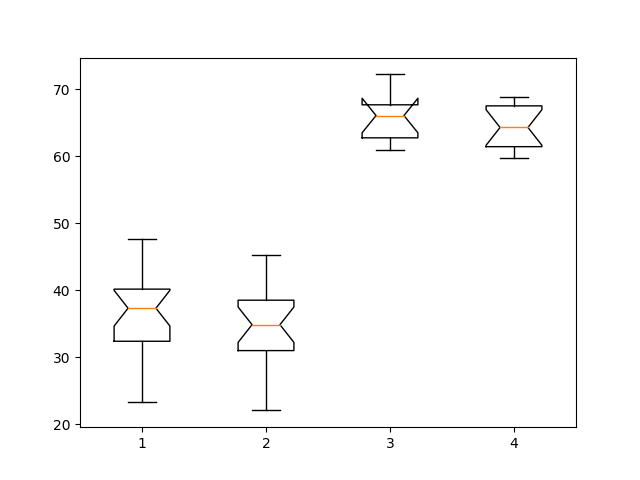

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create an empty list
boxplot = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
#for drug in treatments:
   # boxplot.append(list(fintumor['Tumor Volume (mm3)'].dropna()))
    
    
    
tumor_lists = finaltumor.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
finaltumor = pd.DataFrame(tumor_lists)
finaltumor = finaltumor.reindex(treatments)
tumor_vols = [vol for vol in finaltumor['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, treatments)

plt.show()


## Line and Scatter Plots

<IPython.core.display.Javascript object>


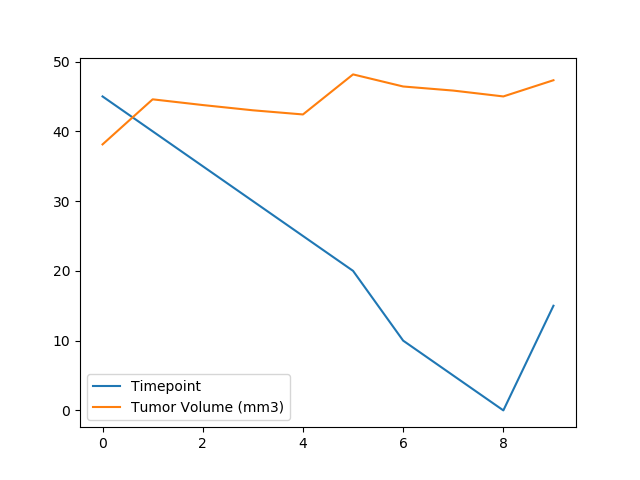

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timeline = combine_drop[combine_drop["Mouse ID"].isin(["j119"])]
timeline

timelinedata = timeline[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
timelinedata

lineplot = timelinedata.reset_index()
lineplot

lineplotfinal = lineplot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
lineplotfinal 

plt.plot()
lines = lineplotfinal .plot.line()

<IPython.core.display.Javascript object>


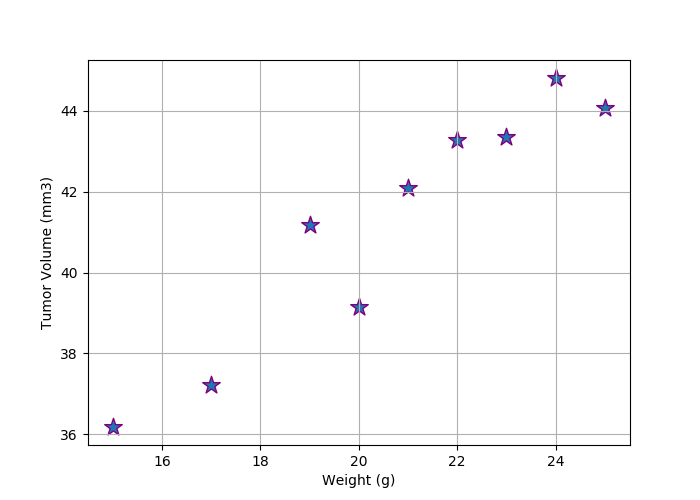

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter= combine_drop[combine_drop["Drug Regimen"].isin(["Capomulin"])]

scatter2 = sorttumors[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = scatter2.sort_values(["Weight (g)"], ascending=True)

scatter2 = scatter.reset_index()

weight = scatter2.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

scatter3 = pd.DataFrame(weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#
scatter = scatter3.plot.scatter(x='Weight (g)', 
                                y='Tumor Volume (mm3)', 
                                marker='*',
                                facecolors='green',
                                edgecolors='purple',
                                grid = True, 
                                figsize= (7,5),
                               s=175,)


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_sorted['Weight (g)'],capomulin_sorted['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.59


In [27]:
x_axis = capomulin_sorted['Weight (g)']
x_axis = capomulin_sorted['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The slope is:{slope}")
print(f"The intercept is:{intercept}")
print(f"rvalue (Correlation coefficient) is:{rvalue}")
print(f"pandas (Correlation coefficient) is:{corr}")
print(f"stderr is:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The slope is:1.3325533329497157
The intercept is:16.253385936069506
rvalue (Correlation coefficient) is:0.5876112341353744
pandas (Correlation coefficient) is:0.59
stderr is:0.04225218377942321
y = 1.33x + 16.25


<IPython.core.display.Javascript object>


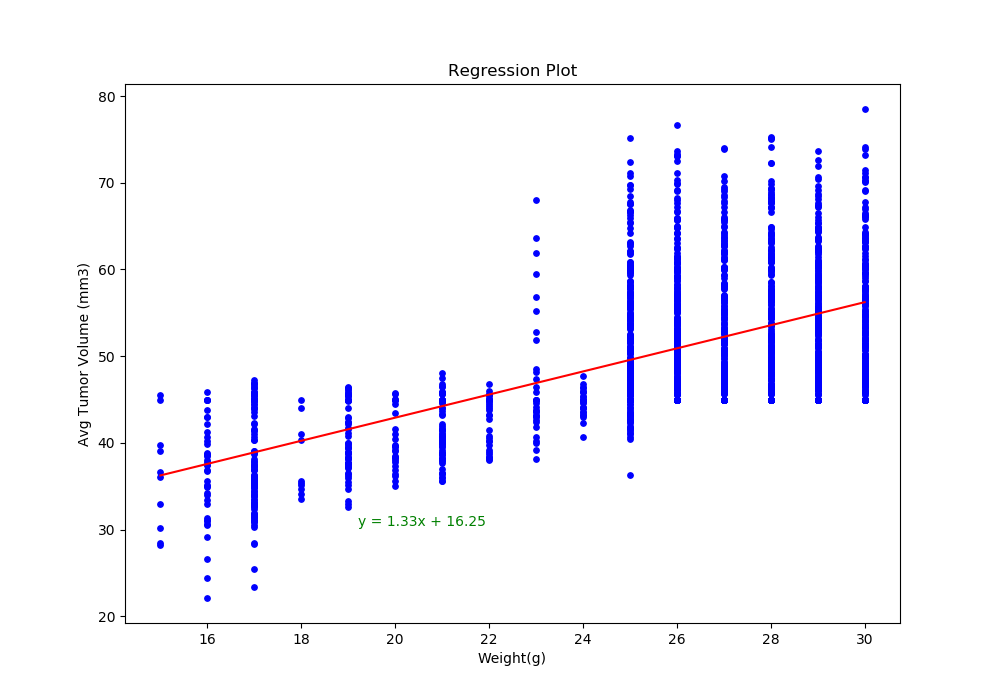

The r-squared is: 0.34528696248209784


In [44]:
fig1, ax1 = plt.subplots(figsize=(10, 7))
plt.scatter(x_axis,y_axis,s=15, color="blue")
plt.plot(x_axis,regress_values,"r-")
plt.title('Regression Plot')
plt.xlabel('Weight(g)')
plt.ylabel('Avg Tumor Volume (mm3)')
ax1.annotate(line_eq, xy=(20, 40), 
             xycoords='data',
             xytext=(0.3, 0.2), 
             textcoords='axes fraction',
             verticalalignment='top',
             fontsize=10,
             color="green")

print(f"The r-squared is: {rvalue**2}")

plt.show()